In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
stockData = pd.read_csv('stocks_classification.csv')

In [3]:
stockData.head()

,Unnamed: 0,date,open,high,low,close,trade,volume,Name,up,down,up_ema,down_ema,RS,RSI,EMA
0,0,8/2/2013,15.07,15.12,14.63,14.75,No,8407500,AAL,0.00,0.00,0.00,0.00,0.0,0.0,14.75
1,1,11/2/2013,14.89,15.01,14.26,14.46,No,8882000,AAL,0.00,0.29,0.00,0.29,0.0,0.0,14.46
2,2,12/2/2013,14.45,14.51,14.10,14.27,No,8126000,AAL,0.00,0.19,0.00,0.19,0.0,0.0,14.27
3,3,13/2/2013,14.30,14.94,14.25,14.66,Yes,10259500,AAL,0.39,0.00,0.39,0.00,0.0,0.0,14.66
4,4,14/2/2013,14.94,14.96,13.16,13.99,No,31879900,AAL,0.00,0.67,0.00,0.67,0.0,0.0,13.99


In [4]:
stockData['open'].describe()

count    619029.000000
mean         83.023334
std          97.378769
min           1.620000
25%          40.220000
50%          62.590000
75%          94.370000
max        2044.000000
Name: open, dtype: float64

In [5]:
stockData['trade'].describe()

count     619040
unique         2
top          Yes
freq      318981
Name: trade, dtype: object

Here, trade is Yes if on a given day, close > open. Indicates that by buying the stock when it opens, user will be better off by the end of the day. First, we aim to visually understand the distribuition. 

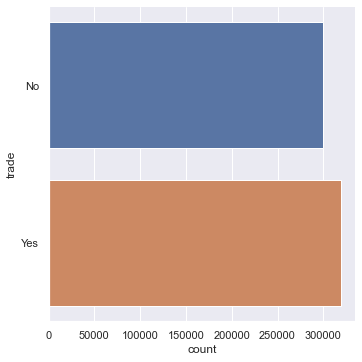

In [6]:
sb.catplot(y = 'trade', data = stockData, kind = "count")

In [7]:
countY, countX = stockData.trade.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  318981 : 300059


We aimed to check the initial distribution of the response variable to identify if there is "class imbalance". As the ratio between 'Yes' and 'No' is pretty even, it aligns with our expectations when it comes to stock trading.

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **Trade**     
Predictor Feature : **Open, High, Low, Close**       


In [8]:
# Extract Response and Predictors
y = pd.DataFrame(stockData["trade"])
X = pd.DataFrame(stockData[["open", "high", "low", "close"]])

Set up the code with Train and Test datasets:

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (495232, 1) (495232, 4)
Test Set  : (123808, 1) (123808, 4)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [10]:
# Summary Statistics for Response
y_train["trade"].value_counts()

Yes    254971
No     240261
Name: trade, dtype: int64

In [11]:
# Summary Statistics for Predictors
X_train.describe()

,open,high,low,close
count,495221.000000,495224.000000,495224.000000,495232.000000
mean,83.039656,83.794482,82.272962,83.059899
std,97.239591,98.068709,96.373984,97.251878
min,1.660000,1.700000,1.500000,1.590000
25%,40.250000,40.650000,39.860000,40.270000
50%,62.650000,63.210000,62.070000,62.670000
75%,94.330000,95.150000,93.520000,94.370000
max,2044.000000,2067.990000,2035.110000,2049.000000


In [12]:
Trade = pd.DataFrame(stockData['trade'])  # Response
Open = pd.DataFrame(stockData['open'])    # Predictor

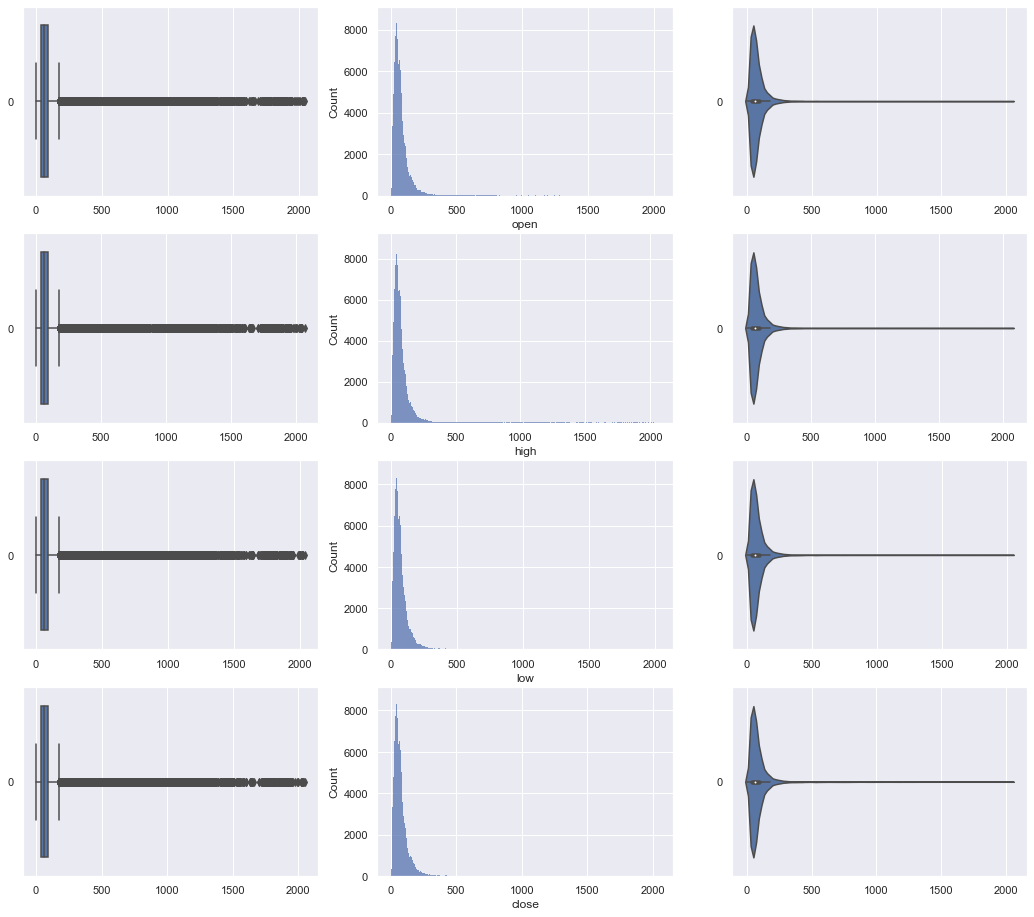

In [13]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:xlabel='open', ylabel='trade'>

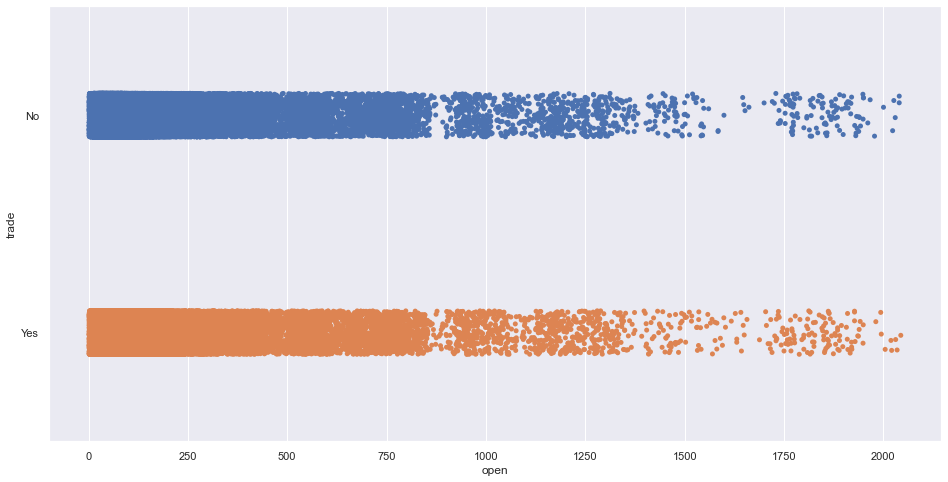

In [14]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'open', y = 'trade', data = stockData)

In [53]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish

# Decision Tree with max depth = 2
tree_CA_SP_d2 = DecisionTreeClassifier(max_depth = 2)

# Decision Tree with max depth = 4
tree_CA_SP_d4 = DecisionTreeClassifier(max_depth = 4)


In [54]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

#Remove bad data
stockData.dropna(inplace = True)

# Extract Response and Predictors
y = pd.DataFrame(stockData['trade'])
X = pd.DataFrame(stockData['open'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (495223, 1) (495223, 1)
Test Set  : (123806, 1) (123806, 1)


In [55]:
# Fit the tree with max depth 2
tree_CA_SP_d2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'open <= 5.71\ngini = 0.5\nsamples = 495223\nvalue = [240171, 255052]\nclass = Y'),
 Text(167.4, 326.16, 'open <= 1.765\ngini = 0.494\nsamples = 1045\nvalue = [578, 467]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.493\nsamples = 1029\nvalue = [575, 454]\nclass = N'),
 Text(502.20000000000005, 326.16, 'open <= 250.965\ngini = 0.5\nsamples = 494178\nvalue = [239593, 254585]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.5\nsamples = 480397\nvalue = [232669, 247728]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.5\nsamples = 13781\nvalue = [6924, 6857]\nclass = N')]

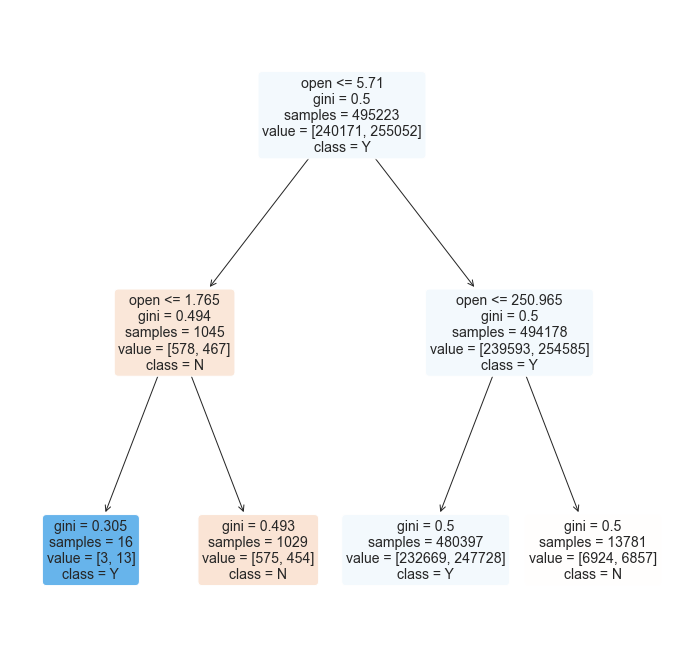

In [56]:
# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

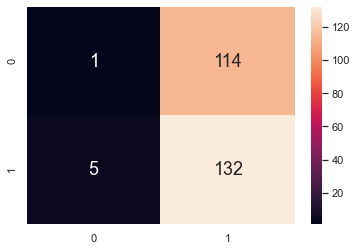

In [91]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree_CA_SP_d2.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [92]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.5277777777777778

TPR Test :	 0.9635036496350365
TNR Test :	 0.008695652173913044

FPR Test :	 0.991304347826087
FNR Test :	 0.0364963503649635


In [93]:
#Creating dfs for AAPL and NVDA
NVDA = stockData.drop(stockData[stockData.Name != 'NVDA'].index)
AAPL = stockData.drop(stockData[stockData.Name != 'AAPL'].index)
NVDA.drop(['Unnamed: 0'], axis = 1, inplace = True)
AAPL.drop(['Unnamed: 0'], axis = 1, inplace = True)
NVDA

,date,open,high,low,close,trade,volume,Name,up,down,up_ema,down_ema,RS,RSI,EMA
422633,8/2/2013,12.370,12.4699,12.29,12.37,No,7677336,NVDA,0.00,0.00,0.000000,0.000000,0.000000,0.000000,12.370000
422634,11/2/2013,12.470,12.6350,12.35,12.51,Yes,10207599,NVDA,0.14,0.00,0.140000,0.000000,0.000000,0.000000,12.510000
422635,12/2/2013,12.395,12.5650,12.38,12.43,Yes,6945065,NVDA,0.00,0.08,0.000000,0.080000,0.000000,0.000000,12.430000
422636,13/2/2013,12.440,12.6650,12.33,12.37,No,21322573,NVDA,0.00,0.06,0.000000,0.060000,0.000000,0.000000,12.370000
422637,14/2/2013,12.200,12.7400,12.05,12.73,Yes,22049335,NVDA,0.36,0.00,0.360000,0.000000,0.000000,0.000000,12.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423887,1/2/2018,238.520,246.9000,238.06,240.50,Yes,12980572,NVDA,0.00,5.30,2.133270,1.818611,1.173021,53.981118,239.241368
423888,2/2/2018,237.000,237.9700,231.17,233.52,No,17961555,NVDA,0.00,6.98,1.706616,2.850889,0.598626,37.446272,238.097094
423889,5/2/2018,227.000,233.2300,205.00,213.70,No,29130140,NVDA,0.00,19.82,1.365293,6.244711,0.218632,17.940760,233.217675
423890,6/2/2018,204.400,225.7000,204.00,225.58,Yes,27870031,NVDA,11.88,0.00,3.468234,4.995769,0.694234,40.976285,231.690140


In [107]:
open_dev_ema = [0] * 1259
high_or_low = []
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

#Creating columns for classfication variables
#RSI sign: 1 if RSI>=70, -1 if RSI <=30, 0 otherwise
#High or low: 1 if dev_ema is positive, -1 otherwise

for i in range(1259):
    
    
    
    
    if (NVDA.iloc[i, 9] != 0) and (NVDA.iloc[i, 10] == 0):
        movement[i] = NVDA.iloc[i, 9]
        movement_sign[i] = 1
    if (NVDA.iloc[i, 10] != 0) and (NVDA.iloc[i, 9] == 0):
        movement[i] = -1 * NVDA.iloc[i, 10]
        movement_sign[i] = -1
    if (NVDA.iloc[i, 14] >= 70):
        rsi_sign[i] = 1
    if (NVDA.iloc[i, 14] <= 30):
        rsi_sign[i] = -1
        
    #if(i == 0):
        #open_dev_ema[i] = 0
    #else:
        #open_dev_ema[i] = NVDA.iloc[i-1, 14] - NVDA.iloc[i, 1]
    open_dev_ema[i] = NVDA.iloc[i, 14] - NVDA.iloc[i, 1]

NVDA['Open DEV from EMA'] = open_dev_ema
NVDA['Movement'] = movement
NVDA['Movement sign'] = movement_sign
NVDA['RSI sign'] = rsi_sign

open_dev_ema = [0] * 1259
high_or_low = []
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

for i in range(1259):
    
    
   
    if (AAPL.iloc[i, 9] != 0) and (AAPL.iloc[i, 10] == 0):
        movement[i] = AAPL.iloc[i, 9]
        movement_sign[i] = 1
    if (AAPL.iloc[i, 10] != 0) and (AAPL.iloc[i, 9] == 0):
        movement[i] = -1 * AAPL.iloc[i, 10]
        movement_sign[i] = -1
        
    if (AAPL.iloc[i, 14] >= 70):
        rsi_sign[i] = 1
    if (AAPL.iloc[i, 14] <= 30):
        rsi_sign[i] = -1
    
    #if(i == 0):
        #open_dev_ema[i] = 0
    #else:
        #open_dev_ema[i] = AAPL.iloc[i-1, 14] - AAPL.iloc[i, 1]
    open_dev_ema[i] = AAPL.iloc[i, 14] - AAPL.iloc[i, 1]

AAPL['Open DEV from EMA'] = open_dev_ema
AAPL['Movement'] = movement
AAPL['Movement sign'] = movement_sign
AAPL['RSI sign'] = rsi_sign

NVDA

,date,open,high,low,close,trade,volume,Name,up,down,up_ema,down_ema,RS,RSI,EMA,Open DEV from EMA,Movement,Movement sign,RSI sign
422633,8/2/2013,12.370,12.4699,12.29,12.37,No,7677336,NVDA,0.00,0.00,0.000000,0.000000,0.000000,0.000000,12.370000,0.000000,0.000000,0,-1
422634,11/2/2013,12.470,12.6350,12.35,12.51,Yes,10207599,NVDA,0.14,0.00,0.140000,0.000000,0.000000,0.000000,12.510000,0.040000,-0.140000,-1,-1
422635,12/2/2013,12.395,12.5650,12.38,12.43,Yes,6945065,NVDA,0.00,0.08,0.000000,0.080000,0.000000,0.000000,12.430000,0.035000,0.080000,1,-1
422636,13/2/2013,12.440,12.6650,12.33,12.37,No,21322573,NVDA,0.00,0.06,0.000000,0.060000,0.000000,0.000000,12.370000,-0.070000,0.060000,1,-1
422637,14/2/2013,12.200,12.7400,12.05,12.73,Yes,22049335,NVDA,0.36,0.00,0.360000,0.000000,0.000000,0.000000,12.730000,0.530000,-0.360000,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423887,1/2/2018,238.520,246.9000,238.06,240.50,Yes,12980572,NVDA,0.00,5.30,2.133270,1.818611,1.173021,53.981118,239.241368,0.721368,0.000000,0,1
423888,2/2/2018,237.000,237.9700,231.17,233.52,No,17961555,NVDA,0.00,6.98,1.706616,2.850889,0.598626,37.446272,238.097094,1.097094,0.000000,0,1
423889,5/2/2018,227.000,233.2300,205.00,213.70,No,29130140,NVDA,0.00,19.82,1.365293,6.244711,0.218632,17.940760,233.217675,6.217675,0.000000,0,1
423890,6/2/2018,204.400,225.7000,204.00,225.58,Yes,27870031,NVDA,11.88,0.00,3.468234,4.995769,0.694234,40.976285,231.690140,27.290140,-3.468234,-1,1


In [108]:
# Extract Response and Predictors
y = pd.DataFrame(NVDA['trade'])
X = pd.DataFrame(NVDA['Open DEV from EMA'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1007, 1) (1007, 1)
Test Set  : (252, 1) (252, 1)


In [109]:
# Fit the tree with max depth 4
tree_CA_SP_d4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(776.7360000000001, 1174.1760000000002, 'Open DEV from EMA <= 2.138\ngini = 0.499\nsamples = 1007\nvalue = [476, 531]\nclass = Y'),
 Text(428.54400000000004, 913.248, 'Open DEV from EMA <= 0.208\ngini = 0.5\nsamples = 967\nvalue = [470, 497]\nclass = Y'),
 Text(214.27200000000002, 652.3200000000002, 'Open DEV from EMA <= 0.153\ngini = 0.5\nsamples = 798\nvalue = [403, 395]\nclass = N'),
 Text(107.13600000000001, 391.39200000000005, 'Open DEV from EMA <= 0.146\ngini = 0.5\nsamples = 760\nvalue = [379, 381]\nclass = Y'),
 Text(53.568000000000005, 130.46400000000017, 'gini = 0.5\nsamples = 755\nvalue = [379, 376]\nclass = N'),
 Text(160.704, 130.46400000000017, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Y'),
 Text(321.408, 391.39200000000005, 'Open DEV from EMA <= 0.189\ngini = 0.465\nsamples = 38\nvalue = [24, 14]\nclass = N'),
 Text(267.84000000000003, 130.46400000000017, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = N'),
 Text(374.97600000000006, 130.46400000000017,

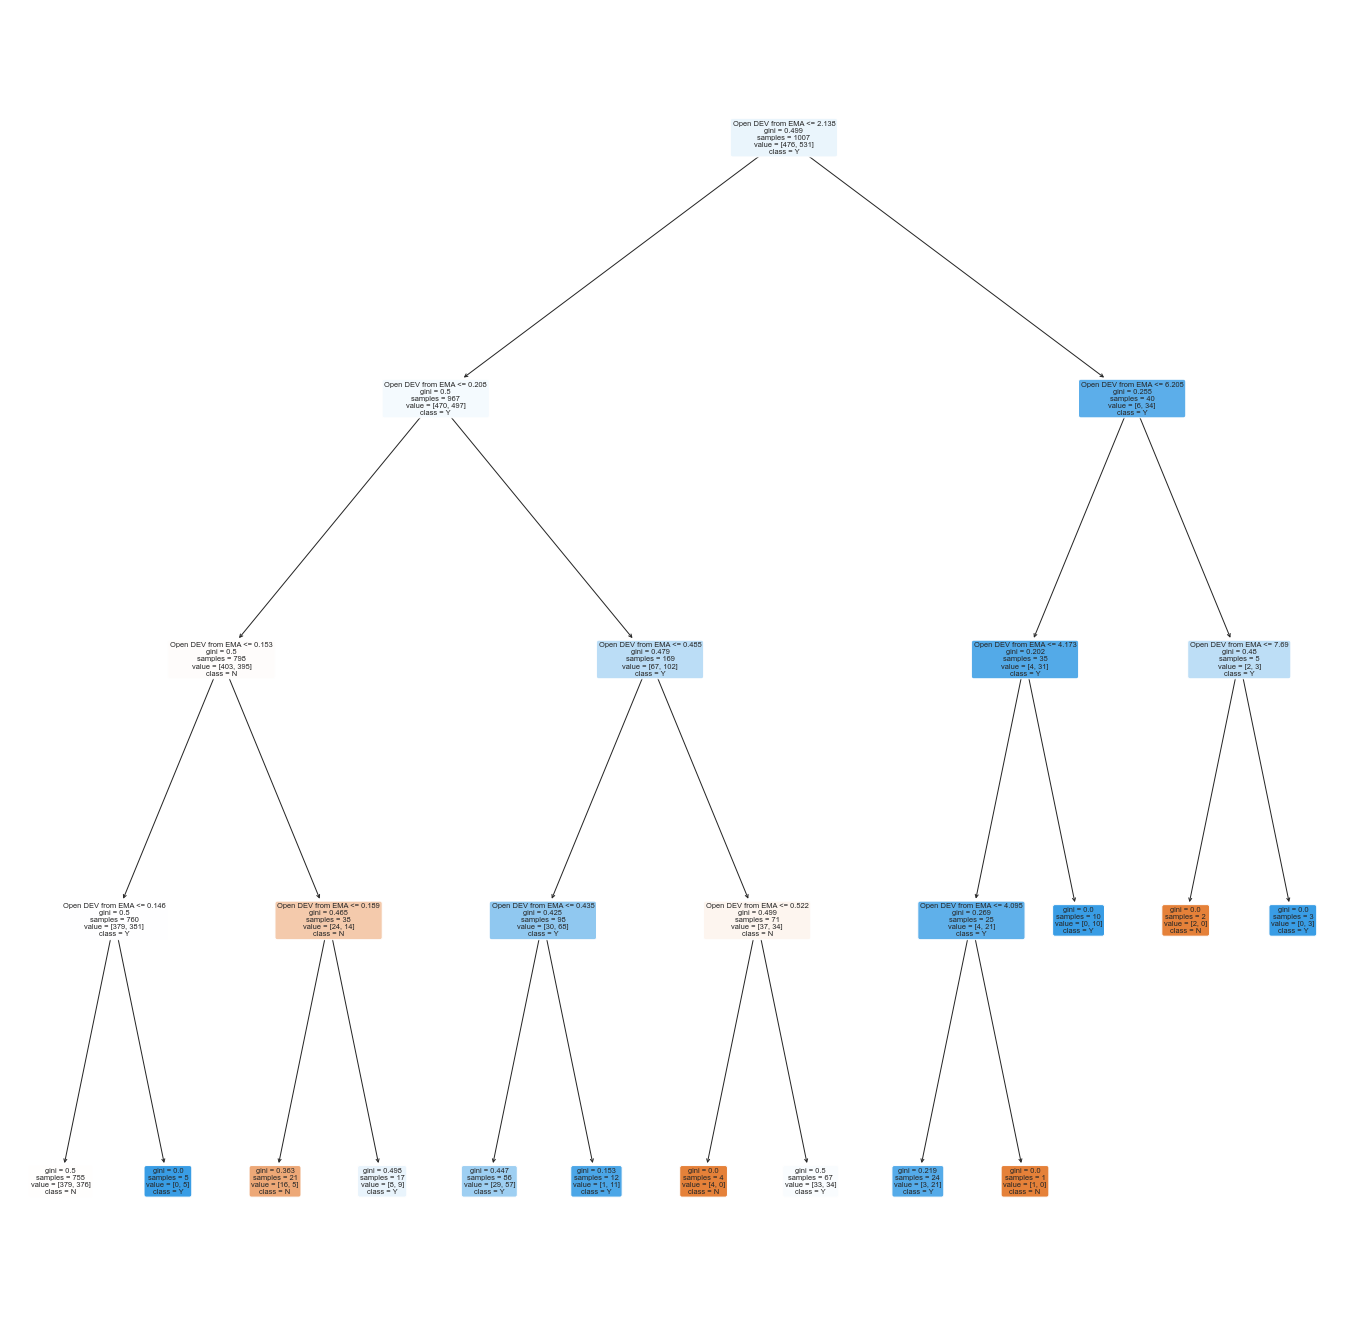

In [116]:
# Plot the tree with max depth 4
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(tree_CA_SP_d4, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

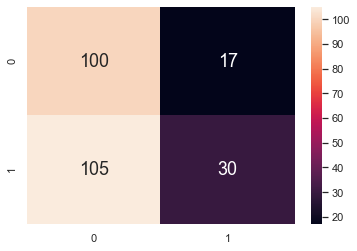

In [117]:
# Predict the Response corresponding to Predictors
y_test_pred = tree_CA_SP_d4.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [112]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d4.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.5158730158730159

TPR Test :	 0.2222222222222222
TNR Test :	 0.8547008547008547

FPR Test :	 0.1452991452991453
FNR Test :	 0.7777777777777778


[Text(334.8, 543.6, 'Open DEV from EMA <= 2.138\ngini = 0.499\nsamples = 1007\nvalue = [476, 531]\nclass = Y'),
 Text(167.4, 326.16, 'Open DEV from EMA <= 0.208\ngini = 0.5\nsamples = 967\nvalue = [470, 497]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.5\nsamples = 798\nvalue = [403, 395]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.479\nsamples = 169\nvalue = [67, 102]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'Open DEV from EMA <= 6.205\ngini = 0.255\nsamples = 40\nvalue = [6, 34]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.202\nsamples = 35\nvalue = [4, 31]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Y')]

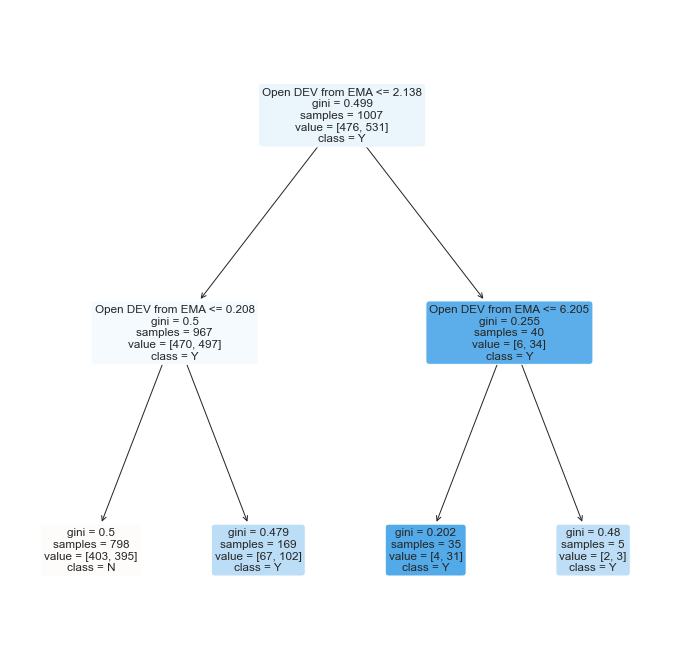

In [113]:
# Fit the tree with max depth 2
tree_CA_SP_d2.fit(X_train, y_train)

# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

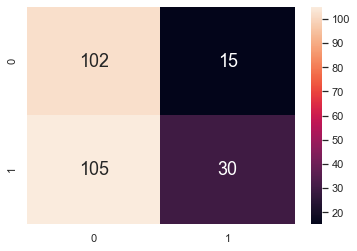

In [114]:
# Predict the Response corresponding to Predictors
y_test_pred = tree_CA_SP_d2.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [115]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.5238095238095238

TPR Test :	 0.2222222222222222
TNR Test :	 0.8717948717948718

FPR Test :	 0.1282051282051282
FNR Test :	 0.7777777777777778
